**Jeremy Anthony**

**Capstone Module 3**

# **CONTENTS:**
1. Business Problem Understanding
2. Load Dataset
3. Cleaning Data and Check Overview Data
4. Data Understanding
5. Feature Engineering: Preprocessing, Scaling, and Encoding
6. Splitting Target and Features
7.  Benchmark Model 
8. Hypertuning the two best models
9. Conclusion
10. Recommendation
--------------------------------------------------------------------

# **1. BUSINESS PROBLEM UNDERSTANDING**

**Daegu Apartment**

**Context**

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

Daegu City or known as the Metropolitan City of Daegu is a city surrounded by mountains in South Korea with a population of more than 2.5 million people. As the 3rd largest metropolitan city in South Korea after Seoul and Busan, like other metropolitan cities, apartments are one of the answers to the residential needs of modern society due to limited residential land and dense business activities in urban areas. In addition, in 2020, the apartment price index in Daegu City was 88.2, or grew 1.9% compared to the previous year, so this shows the potential growth in apartment sales and interest in buying apartments in Daegu City.

The majority of residents, especially in big cities in South Korea, prefer to sell or buy apartments through real estate agents, so this has encouraged many real estate agents to offer their services to help sell or buy apartments. A person or a company can usually bid on an apartment unit. Apartment unit prices can be determined by bidders through a platform so that sometimes it is quite difficult for apartment owners to set a price that can adjust to market prices.

If the selling price is too high compared to the market price it will be difficult to make a sale. Conversely, if the selling price is too low, the owner will find it difficult to get the maximum profit. Therefore, for real estate agents who will help apartment owners to determine the estimated selling price of apartments, it is important to analyze the pricing of apartments that are influenced by various internal and external factors using the apartment price dataset in Daegu as a reference.


**Features**

-	Hallway Type: Apartment type
-	TimeToSubway: Time needed to the nearest subway station
-	SubwayStation: The name of the nearest subway station
-	N_FacilitiesNearBy(ETC): The number of facilities nearby
-	N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
-	N_SchoolNearBy(University): The number of universities nearby
-	N_Parkinglot(Basement): The number of the parking lot
-	YearBuilt: The year the apartment was built
-	N_FacilitiesInApt: Number of facilities in the apartment
-	Size(sqft): The apartment size (in square feet)
-	SalePrice: The apartment price (Won)

**Problem Statement:**


One of the biggest challenges for real estate agents, especially in the city of Daegu, South Korea, is determining the selling price of an apartment according to the market price because the selling price is an important indicator for a dwelling to be sold. Before making a transaction, consumers will find out about the price of the apartment being sold and compare it with the prices of other apartments. Usually, the higher the price offered by an apartment, consumers will expect higher quality and facilities. So along with the increasing number of apartments for sale, determining the right selling price to be able to remain competitive in the environment of the city of Daegu, South Korea is very important to ensure that the price of apartments in an area is still considered reasonable.

Therefore, what happens if the sale price does not match the market price:

1. price too high --> difficult to make sales
2. price too low --> difficult to get maximum profit

**Goals**

Based on these problems, as a data analyst we will build a model that can predict apartment selling prices according to market prices based on various factors both external and internal that can determine apartment selling prices such as location, facilities, building age, size, and so on.

By using the right prediction model, we can help real estate agents to determine the right apartment selling price in the city of Daegu, South Korea so as to increase the success rate for marketing and selling the apartment unit. Determining the right apartment selling price is important because this will also determine whether the apartment can be sold immediately at a reasonable price and can increase profits for apartment owners.

**Analytic Approaches**

So, what needs to be done to be able to determine the right apartment selling price in the city of Daegu, South Korea is to conduct data analysis to explore and see patterns in the data and build a regression model as a method to test whether there is influence between various features and the selling price of a given apartment. expressed in the form of a mathematical equation. The regression model that is formed can also predict the selling price of the apartment and so it can help new apartment owners to determine the selling price of the apartment.

**Metric Evaluation**

The evaluation metrics used for the regression model are RMSE, MAE, and MAPE. However, MAPE was chosen as the most important metric evaluation to provide results that are easy to interpret and can assist in explaining prediction errors to stakeholders, namely real estate agents. In addition, the regression model will be evaluated exploratively using residual plots.

In the regression model there is a residual which is the difference between the predicted value and the actual value so that the residual is used to measure how close the predicted value is to reality. RMSE is the root of the mean squared residual. MAE is the average of absolute errors and is a metric that is not sensitive to outliers. MAPE is the percentage of average error in absolute terms. The smaller the RMSE, MAE, and MAPE values, it means that the model will be better at predicting apartment prices.

In addition, metric evaluation of R-Squared and Adjusted R-Squared can also be used if the best model chosen is a linear model. R-squared is the coefficient of determination used to measure how well the regression line represents the data. The R-Squared value has a range between 0 - 1 and the closer the value is to 1, the better the regression line will be in representing the data.

In [59]:
#library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# cross validation
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, KFold

#voting and stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew
# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Models
from sklearn.linear_model import LinearRegression, Ridge as RidgeRegressor, Lasso as LassoRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')




# **2. LOAD DATASET**

In [60]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


# **3. CLEANING DATA AND CHECK OVERVIEW DATA**

In [61]:
#Check if there is a missing value in the dataset
df.isna().sum().sum()

0

In [62]:
#check the data type of every column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [63]:
#check the value counts of every column to see if there are extreme outliers for data cleaning.
display(df['HallwayType'].value_counts())
display(df['TimeToSubway'].value_counts())
display(df['SubwayStation'].value_counts())
display(df['N_FacilitiesNearBy(ETC)'].value_counts())
display(df['N_FacilitiesNearBy(PublicOffice)'].value_counts())
display(df['N_SchoolNearBy(University)'].value_counts())
display(df['N_Parkinglot(Basement)'].value_counts())
display(df['YearBuilt'].value_counts())
display(df['N_FacilitiesInApt'].value_counts())
display(df['Size(sqf)'].value_counts())
display(df['SalePrice'].value_counts())



HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

N_FacilitiesNearBy(ETC)
0.0    1828
5.0    1334
1.0     631
2.0     330
Name: count, dtype: int64

N_FacilitiesNearBy(PublicOffice)
5.0    1252
3.0     844
2.0     530
7.0     455
6.0     451
1.0     291
4.0     254
0.0      46
Name: count, dtype: int64

N_SchoolNearBy(University)
2.0    1359
1.0     833
5.0     832
4.0     606
3.0     396
0.0      97
Name: count, dtype: int64

N_Parkinglot(Basement)
536.0     664
798.0     502
0.0       493
1270.0    420
930.0     322
524.0     220
203.0     217
605.0     213
475.0     203
1174.0    159
184.0     139
181.0     108
79.0      104
1321.0     78
56.0       74
76.0       51
18.0       51
108.0      50
218.0      41
400.0      14
Name: count, dtype: int64

YearBuilt
2007    853
2005    502
2006    460
1993    451
1992    326
2013    322
2014    292
1986    273
2008    203
2009    171
2015     92
1997     67
1985     51
1978     49
2003      7
1980      4
Name: count, dtype: int64

N_FacilitiesInApt
4     1001
7      838
5      810
10     544
3      477
8      203
9      159
2       50
1       41
Name: count, dtype: int64

Size(sqf)
914     663
644     488
910     370
868     200
572     196
       ... 
281       1
277       1
273       1
1256      1
832       1
Name: count, Length: 89, dtype: int64

SalePrice
149274    46
168141    45
75920     41
265486    40
194690    36
          ..
242274     1
59115      1
349115     1
210265     1
42477      1
Name: count, Length: 838, dtype: int64

**OUTLIERS CHECK**

In [64]:
df.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [65]:
#Columns that need to be checked: N_Parking_lot(Basement), N_facilities, Size(sqf)
#Target: Sale Price


# N_Parking_Lot(Basement)
Q1 = df['N_Parkinglot(Basement)'].quantile(0.25)
Q3 = df['N_Parkinglot(Basement)'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['N_Parkinglot(Basement)'] >= Q1 - 1.5 * IQR) & (df['N_Parkinglot(Basement)'] <= Q3 + 1.5 *IQR)
df_no_outlier = df.loc[filter]  

print("Number of outliers need to be removed from N_Parking Lot: ", len(df) - len(df_no_outlier))

# N_faciities
Q1_F = df['N_FacilitiesInApt'].quantile(0.25)
Q3_F = df['N_FacilitiesInApt'].quantile(0.75)
IQR_F = Q3_F - Q1_F

filter_F = (df['N_FacilitiesInApt'] >= Q1_F- 1.5 * IQR_F) & (df['N_FacilitiesInApt'] <= Q3_F + 1.5 *IQR_F)
df_no_outlier_F = df.loc[filter_F]  

print("Number of outliers need to be removed from N_Facilities: ", len(df) - len(df_no_outlier_F))

# size(sqf)
Q1_S = df['Size(sqf)'].quantile(0.25)
Q3_S = df['Size(sqf)'].quantile(0.75)
IQR_S = Q3_S - Q1_S

filter_S = (df['Size(sqf)'] >= Q1_S- 1.5 * IQR_S) & (df['Size(sqf)'] <= Q3_S + 1.5 *IQR_S)
df_no_outlier_S = df.loc[filter_S]  

print("Number of outliers need to be removed from size(SQR): ", len(df) - len(df_no_outlier_S))

# Sale Price
Q1_P = df['SalePrice'].quantile(0.25)
Q3_P = df['SalePrice'].quantile(0.75)
IQR_P = Q3_P - Q1_P

filter_P = (df['SalePrice'] >= Q1_P- 1.5 * IQR_P) & (df['SalePrice'] <= Q3_P + 1.5 *IQR_P)
df_no_outlier_P = df.loc[filter_P]  

print("Number of outliers need to be removed from sale price: ", len(df) - len(df_no_outlier_P))


Number of outliers need to be removed from N_Parking Lot:  0
Number of outliers need to be removed from N_Facilities:  0
Number of outliers need to be removed from size(SQR):  98
Number of outliers need to be removed from sale price:  27


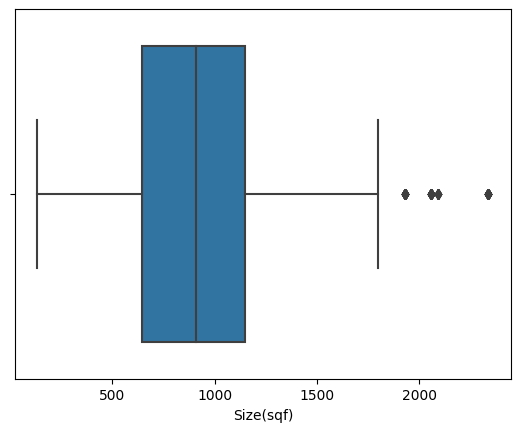

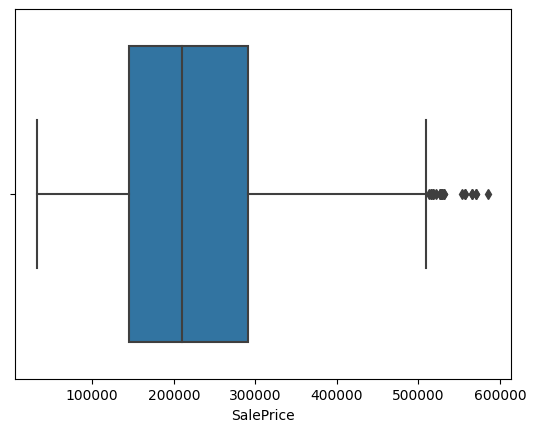

Size(sqf)
1928    34
2337    29
2056    27
2092     8
Name: count, dtype: int64

In [66]:
#Visualize in boxplot to see the outliers

sns.boxplot(x=df['Size(sqf)']) #There are extreme outliers in size(sqf), the one that is over 2250.
plt.show()

#REMOVE THE EXTREME OUTLIERS

sns.boxplot(x=df['SalePrice']) #There are no extreme outliers in sale price
plt.show()

# size(sqf)
Q1_S = df['Size(sqf)'].quantile(0.25)
Q3_S = df['Size(sqf)'].quantile(0.75)
IQR_S = Q3_S - Q1_S

outliers_size_sqr= df[(df['Size(sqf)'] < Q1_S- 1.5 * IQR_S) | (df['Size(sqf)'] > Q3_S + 1.5 *IQR_S)]
outliers_size_sqr['Size(sqf)'].value_counts() #there are 29 values in size(sqf) that are over 2250. 




**Data baru setelah cleaning**

In [67]:
#create the new dataset after cleaning. (remove the extreme outliers in column: size(sqf))
df = df = df[df['Size(sqf)'] <= 2250].reset_index(drop=True)
df



,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4089,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4090,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4091,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4092,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


# **4. DATA UNDERSTANDING**

The data used is the Daegu Apartment dataset which contains the type, size, location, facilities, year of construction, and the selling price of apartments in the city of Daegu, South Korea which were built from 1978 to 2015.

**Attribute Information**  
There are 11 columns in the Daegu Apartment dataset, which are as follows:

| Attribute | Data Type | Description |
| --- | --- | --- |
| HallwayType| Object | Apartment Type |
| TimeToSubway | Object | The time it takes to reach the nearest subway station |
| SubwayStation | Object | Nearest station name |
| N_FacilitiesNearBy(ETC) | Float | number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of Public Office nearby |
| N_SchoolNearBy(University) | Float | Number of Universities nearby |
| N_Parkinglot(Basement) | Float | Number of Parking lots in the basement |
| YearBuilt | Integer | The year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqft) | Integer | Apartment size (in square feet) |
| SalePrice | Integer | Apartment price (in Won) |

In [68]:
#change format in this column.
display(df['TimeToSubway'].unique())
#difference of punctuation in the TimeToSubway Data '0-5min' and '10min~15min'
 
df.loc[df['TimeToSubway']=='5min~10min','TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway']=='10min~15min','TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway']=='15min~20min','TimeToSubway']='15min-20min'


array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

**Before we go further to the preprocessing, I decided to change the format of the 'TimeToSubway' because there are different punctuations: '~'  and '-'. This is necessary to match the format to avoid typos.**

In [69]:
#after changing the format
df['TimeToSubway'].unique()

array(['0-5min', '10min-15min', '15min-20min', '5min-10min',
       'no_bus_stop_nearby'], dtype=object)

**Explanatory Data Analysis**

Exploratory Data Analysis (EDA) is an essential step in the data analysis pipeline. The primary purpose of EDA is to help you understand the data you're working with, uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

Here are the main purposes of EDA:

Data Cleaning: EDA helps identify errors, missing values, outliers, and inconsistencies in the data that need to be addressed before further analysis.

Understanding relationships: EDA allows you to discover patterns and relationships between variables in your dataset. For instance, it can highlight correlation between variables, or show how a particular outcome is influenced by one or more parts of your data.

Building intuition about the data: By visualizing and summarizing your data, EDA can help you gain a better understanding of your dataset's distribution, central tendencies, and variability. This intuition can be critical for further data processing and model building.

Formulating Hypotheses: EDA can guide you in defining or refining your hypotheses by revealing trends and patterns that prompt questions about the data.

Providing insights for feature engineering: EDA can provide useful insights that help in feature selection, transformation, and creation, which are crucial steps in building a machine learning model.

Establishing a framework for further analysis: By helping you better understand your data's structure and characteristics, EDA can inform how you might want to proceed with further analysis, modeling, and interpretation of results.

The ultimate goal of EDA is to provide a solid foundation for the subsequent stages in the data analysis pipeline, including pre-processing, modeling, and model evaluation.







In [70]:
df.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4094,4094,4094,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000,4094.000000
unique,3,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,0-5min,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2528,1953,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.909135,4.122130,2.730337,569.212750,2003.070591,5.830728,944.838788,221662.577919
std,NaN,NaN,NaN,2.191325,1.802144,1.489789,411.814553,8.897255,2.343759,367.035451,107030.802037
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,NaN,NaN,NaN,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1131.000000,291150.000000


In [71]:
#check overall data:
display(df)
display(df['HallwayType'].value_counts() / len(df))
display(df['TimeToSubway'].value_counts() / len(df))
display(df['SubwayStation'].value_counts() / len(df))
#Find out the total subway station count based on their time to subway to know which station can be considered the nearest to the majority apartment in Daegu
display(df.groupby(['TimeToSubway','SubwayStation']).size().sort_values(ascending=False))
#Find out all the average facilities available in the apartment (facilities, offices, universities, and parking lot)
average_facilities = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']
display(df[average_facilities].mean())
#Find out the average apartments in Daegu was built (in terms of their YearBuilt)
display(f'Average apartments in Daegu is built on {df["YearBuilt"].mean()}')
min_year = df["YearBuilt"].min()
max_year = df["YearBuilt"].max()
display(f'The oldest apartment in the dataset was built in {min_year}.')
display(f'The newest apartment in the dataset was built in {max_year}.')
#Find out the average facilities available in Daegu
mean_facilities = df["N_FacilitiesInApt"].mean()
max_facilities = df["N_FacilitiesInApt"].max()
min_facilities = df["N_FacilitiesInApt"].min()

display(f'The average number of facilities in an apartment is {mean_facilities}.')
display(f'The maximum number of facilities in an apartment is {max_facilities}.')
display(f'The minimum number of facilities in an apartment is {min_facilities}.')

#Find out average size of apartments in Daegu
mean_size = df["Size(sqf)"].mean()
display(f'The average size in square feet is {mean_size}.')

#Find out average sale price of apartments in Daegu
mean_saleprice = df["SalePrice"].mean()
display(f'The average sale price is {mean_saleprice}.')





,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4089,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4090,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4091,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4092,corridor,5min-10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


HallwayType
terraced    0.617489
mixed       0.269174
corridor    0.113337
Name: count, dtype: float64

TimeToSubway
0-5min                0.477040
5min-10min            0.192233
15min-20min           0.146556
10min-15min           0.142404
no_bus_stop_nearby    0.041768
Name: count, dtype: float64

SubwayStation
Kyungbuk_uni_hospital    0.281387
Myung-duk                0.247924
Banwoldang               0.129213
Bangoge                  0.122618
Sin-nam                  0.114069
no_subway_nearby         0.070835
Chil-sung-market         0.018075
Daegu                    0.015877
Name: count, dtype: float64

TimeToSubway        SubwayStation        
0-5min              Kyungbuk_uni_hospital    791
15min-20min         Myung-duk                526
5min-10min          Bangoge                  502
0-5min              Banwoldang               479
                    Sin-nam                  416
10min-15min         Kyungbuk_uni_hospital    361
0-5min              Myung-duk                267
10min-15min         Myung-duk                222
no_bus_stop_nearby  no_subway_nearby         171
5min-10min          no_subway_nearby         119
15min-20min         Chil-sung-market          74
5min-10min          Daegu                     65
                    Sin-nam                   51
                    Banwoldang                50
dtype: int64

N_FacilitiesNearBy(ETC)               1.909135
N_FacilitiesNearBy(PublicOffice)      4.122130
N_SchoolNearBy(University)            2.730337
N_Parkinglot(Basement)              569.212750
dtype: float64

'Average apartments in Daegu is built on 2003.0705911089399'

'The oldest apartment in the dataset was built in 1978.'

'The newest apartment in the dataset was built in 2015.'

'The average number of facilities in an apartment is 5.830727894479726.'

'The maximum number of facilities in an apartment is 10.'

'The minimum number of facilities in an apartment is 1.'

'The average size in square feet is 944.8387884709331.'

'The average sale price is 221662.5779189057.'

**There are several keypoints we get from the data:**
- There are 4094 rows with 11 features in the daegu apartment dataset.
- There are three types of apartments: Terraced (61.74%), Mixed(26.91%) and corridor (11.3%)
- The majority of apartments in Daegu are considered quite close to the station because majority people only need 0-5 min to the station and Kyungbuk_uni_hospital station is the nearest to the majority of the apartment. 
- The apartments in Daegu on average have 2 facilities, 4 public offices, 3 universities and 569 parking lots (nearby)
- Average apartments in Daegu are built in 2003 and the oldest and newest apartments are built in 1978 and 2015, respectively.
- Average apartments in Daegu have 6 facilities, in which at least the apartments have 1 facility and the maximum facilities available available in Daegu are 10 facilities.
- Average size apartments in Daegu are 944.84 square feet
- Average sale price apartments in Daegu are 221.662,58 won
- It can assumed that average sale price apartment in Daegu are 234,6 won/square feet




**Data Distribution**

We are going to see the data distribution using histogram for continuous data:
- YearBuilt
- size(sqf)
- SalePrice


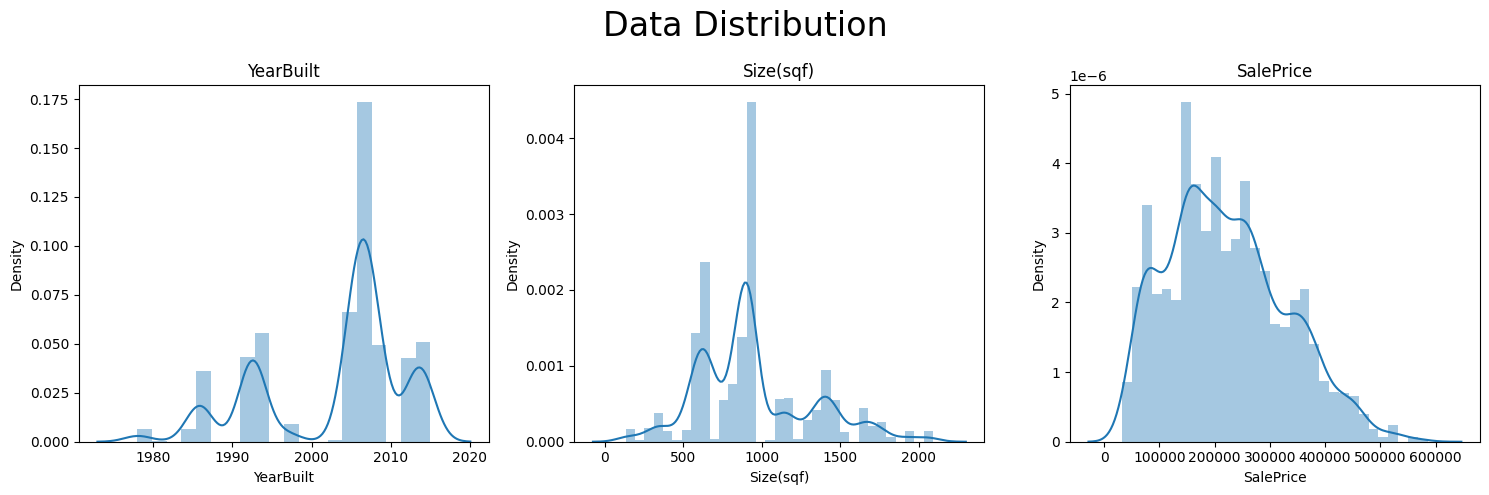

,Column,Distribusi
0,YearBuilt,Data Not Normally Distributed
1,Size(sqf),Data Not Normally Distributed
2,SalePrice,Data Not Normally Distributed


,Column,Skewness
0,YearBuilt,-0.828819
1,Size(sqf),0.709679
2,SalePrice,0.453348


In [72]:
# Check if the data is normally distributed for continuous feature: YearBuilt, Size(sqf), dan SalePrice

columns = ['YearBuilt', 'Size(sqf)', 'SalePrice']

fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axs[i])
    axs[i].set_title(col)

fig.suptitle('Data Distribution', size=24)
plt.tight_layout()
plt.show()

# Normality test feature YearBuilt, Size(Sqf), dan SalePrice

column=['YearBuilt','Size(sqf)','SalePrice']

Result=[]
for i in column:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        Result.append('Data Normally Distributed')
    else:
        Result.append('Data Not Normally Distributed')

display(pd.DataFrame({'Column':column, 'Distribusi':Result}))

#Check each of skewness because the three features are not normally distributed


Result_Skew=[]
for i in column:
    Result_Skew=skew(df[column])

display(pd.DataFrame({'Column':column, 'Skewness':Result_Skew}))

**Findings:**
1. Based on the histogram and Normality test, the three columns: YearBuilt, size(sqf), and SalePrice **data not normally distributed**
2. Based on the histogram and skewness:
- YearBuilt's skewness is negative so left skewed distribution: **Apartments in Daegu tend to be old because most of the apartments have been built long enough**
- size(sqf) and SalePrice's skewness are positive:**The apartment size in Daegu tend to be wide and the sale price is considered to be expensive too**

**Visualization**

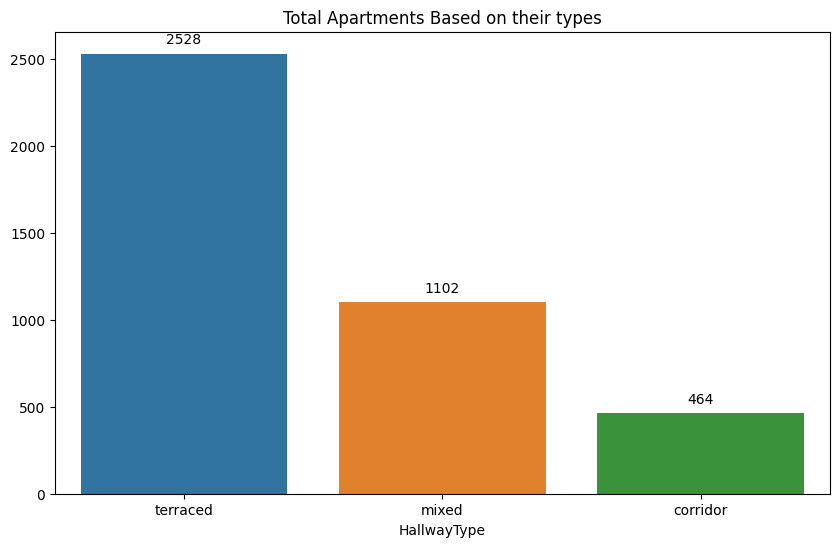

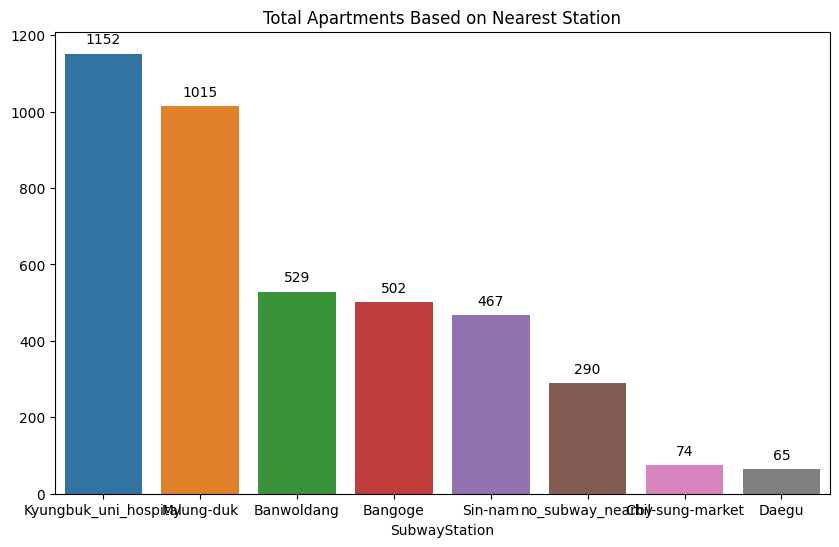

In [73]:
# Total apartments based on their types.

plt.figure(figsize = (10,6))

# Prepare the data
hallway_data = df['HallwayType'].value_counts()

# Create the barplot
fig = sns.barplot(x=hallway_data.index, y=hallway_data.values)

# Annotate the bars
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Apartments Based on their types')
plt.show()


#Total apartments based on nearest station
plt.figure(figsize = (10,6))

# Prepare the data
subway_data = df['SubwayStation'].value_counts()

# Create the barplot
fig = sns.barplot(x=subway_data.index, y=subway_data.values)

# Annotate the bars
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Apartments Based on Nearest Station')
plt.show()


**The Majority of The Apartments sold are terraced and mixed types and Majority of apartments are close to Kyungbuk uni hospital and Myung-duk stations**


**Correlation between HallwayType(Apartment Type), Size(sqf), N_FacilitiesInApt(Facilities available in apartment), TimeToSubway (Time to nearest station), and YearBuilt to the sale price of the apartment.**

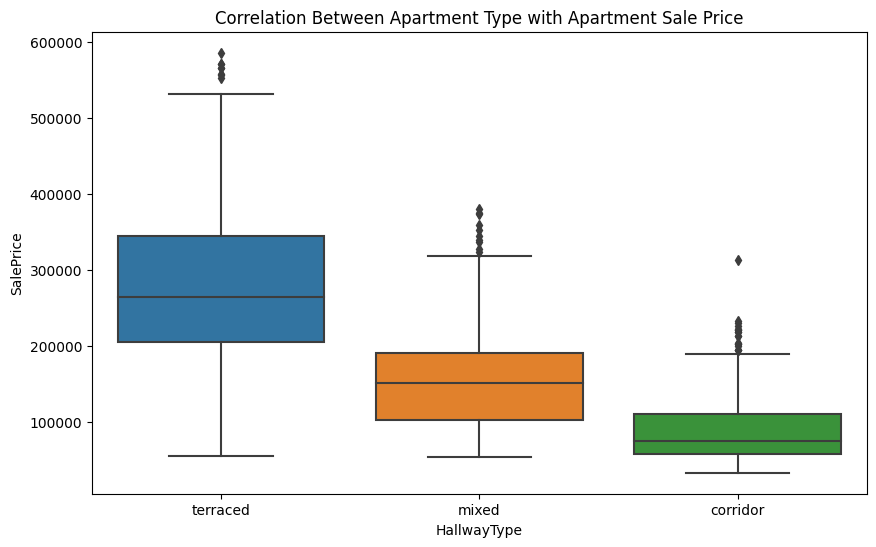

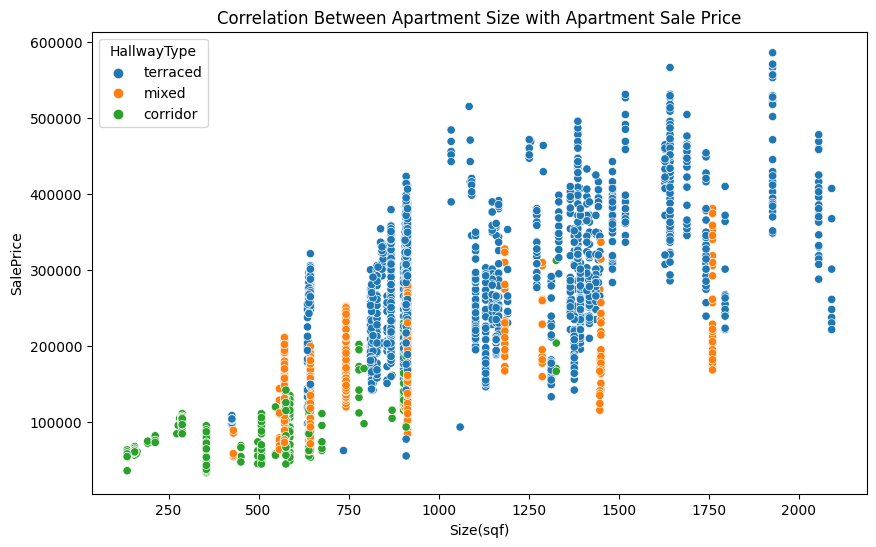

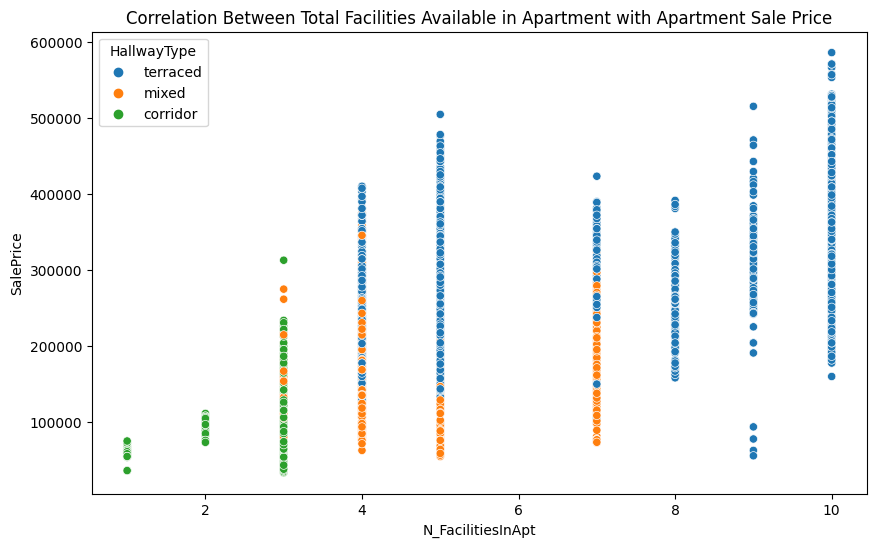

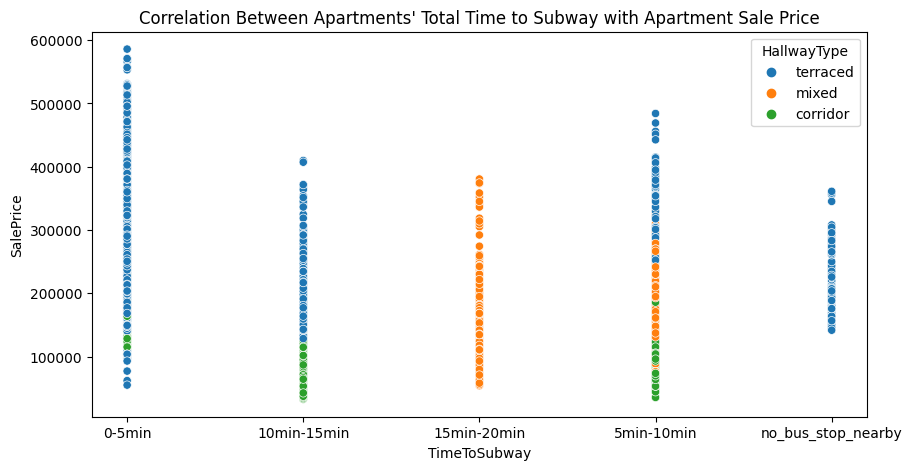

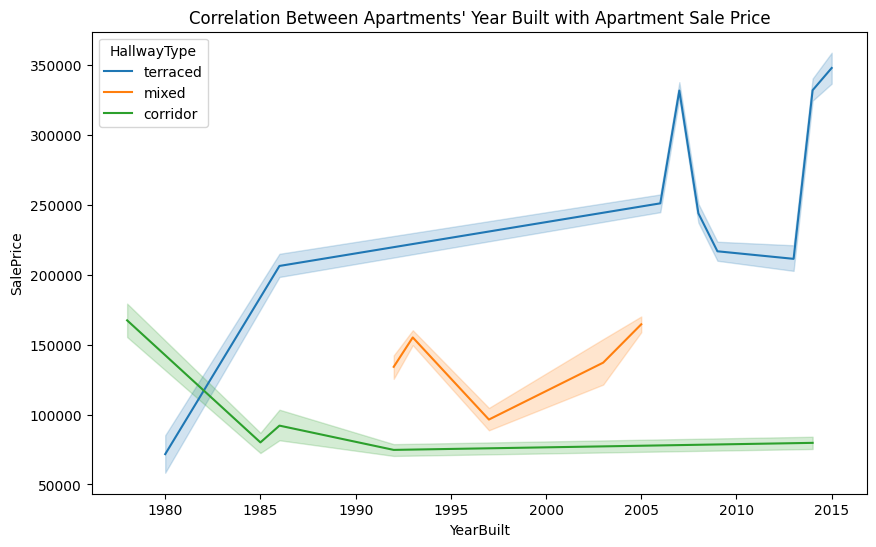

HallwayType
corridor     509.153017
mixed        812.872958
terraced    1082.332674
Name: Size(sqf), dtype: float64


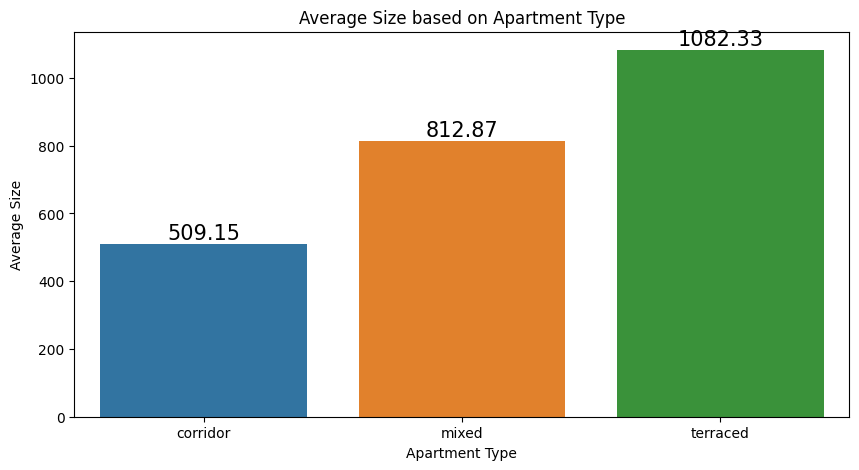

HallwayType
corridor    2.715517
mixed       5.339383
terraced    6.616693
Name: N_FacilitiesInApt, dtype: float64


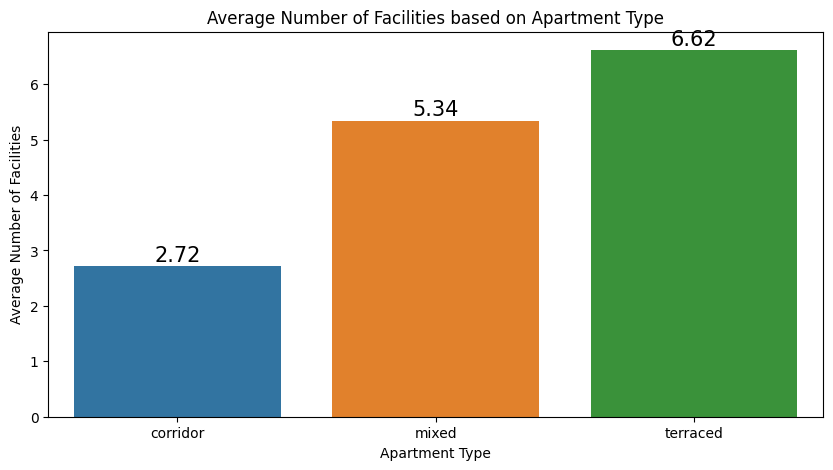

<Figure size 1000x500 with 0 Axes>

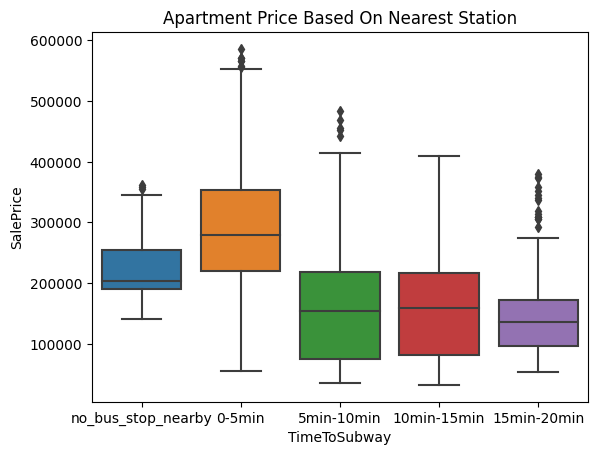

In [74]:
#Correlation#

#HallwayType vs SalePrice
plt.figure(figsize = (10,6))
sns.boxplot(data=df,y='SalePrice',x='HallwayType').set_title('Correlation Between Apartment Type with Apartment Sale Price')
plt.show()


#Size(sqf) vs SalePrice with HallwayType as the Hue
plt.figure(figsize = (10,6))
sns.scatterplot(data=df,x='Size(sqf)',y='SalePrice',hue='HallwayType')
plt.title('Correlation Between Apartment Size with Apartment Sale Price')
plt.show()

#N_FacilitiesInApt vs SalePrice with HallwayType as the hue
plt.figure(figsize = (10,6))
sns.scatterplot(data=df,x='N_FacilitiesInApt',y='SalePrice',hue='HallwayType')
plt.title('Correlation Between Total Facilities Available in Apartment with Apartment Sale Price')
plt.show()

#TimeToSubway vs SalePrice with HallwayType as the hue
plt.figure(figsize = (10,5))
sns.scatterplot(data=df,x='TimeToSubway',y='SalePrice',hue='HallwayType')
plt.title("Correlation Between Apartments' Total Time to Subway with Apartment Sale Price")
plt.show()

#YearBuilt vs SalePrice with HallwayType as the hue
plt.figure(figsize = (10,6))
sns.lineplot(data=df,x='YearBuilt',y='SalePrice',hue='HallwayType')
plt.title("Correlation Between Apartments' Year Built with Apartment Sale Price")
plt.show()

#average size based on the apartment type
average_size = df.groupby('HallwayType')['Size(sqf)'].mean()
print(average_size)

plt.figure(figsize=(10,5))
barplot = sns.barplot(x=average_size.index, y=average_size.values)

plt.title("Average Size based on Apartment Type")
plt.xlabel("Apartment Type")
plt.ylabel("Average Size")

# Add labels on top of each bar
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


#average total facilities based on the apartment type
average_facilities = df.groupby('HallwayType')['N_FacilitiesInApt'].mean()
print(average_facilities)

plt.figure(figsize=(10,5))
barplot = sns.barplot(x=average_facilities.index, y=average_facilities.values)

plt.title("Average Number of Facilities based on Apartment Type")
plt.xlabel("Apartment Type")
plt.ylabel("Average Number of Facilities")

# Add labels on top of each bar
plt.figure(figsize=(10,5))
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


#TimeToSubway vs SalePrice
sns.boxplot(data=df,y='SalePrice',x='TimeToSubway',order=['no_bus_stop_nearby','0-5min','5min-10min','10min-15min','15min-20min']).set_title('Apartment Price Based On Nearest Station')
plt.show()



**Findings:**
1. In terms of Apartment Type, Terraced is the apartment with the **highest sale price**, this is because the **average size** and **total facilities** in **Terraced Type** are the biggest among the other types which are **1082.33 square feet** and **6.62**,respectively. Other than that, the closest TimeToSubway (0-5 min) is dominated by Terraced Type.
2. Mixed type is first built in 1992 - 2005 and from time to time, the sale price for Mixed Type surprisingly dropped gradually in contrast to Terraced Type that sale price is rised gradually from 1980 to 2015.
3. In terms of TimeToSubway, the closer to the station, the higher the sale price.

In [75]:
#Data Features, Data Type, Unique Value and Unique Sample
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_describe_data = pd.DataFrame(columns=['Data Features', 'Data Type', 'Unique', 'Unique Sample'],
                     data=listItem)
df_describe_data

,Data Features,Data Type,Unique,Unique Sample
0,HallwayType,object,3,"[corridor, terraced]"
1,TimeToSubway,object,5,"[0-5min, no_bus_stop_nearby]"
2,SubwayStation,object,8,"[Myung-duk, no_subway_nearby]"
3,N_FacilitiesNearBy(ETC),float64,4,"[0.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,8,"[0.0, 2.0]"
5,N_SchoolNearBy(University),float64,6,"[3.0, 1.0]"
6,N_Parkinglot(Basement),float64,20,"[108.0, 536.0]"
7,YearBuilt,int64,16,"[2006, 2015]"
8,N_FacilitiesInApt,int64,9,"[4, 2]"
9,Size(sqf),int64,88,"[160, 1103]"


In [76]:
df.info()
#change N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement) from float64 to integer because all the four columns are integers

df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype('int64')
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype('int64')
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype('int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4094 non-null   object 
 1   TimeToSubway                      4094 non-null   object 
 2   SubwayStation                     4094 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4094 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4094 non-null   float64
 5   N_SchoolNearBy(University)        4094 non-null   float64
 6   N_Parkinglot(Basement)            4094 non-null   float64
 7   YearBuilt                         4094 non-null   int64  
 8   N_FacilitiesInApt                 4094 non-null   int64  
 9   Size(sqf)                         4094 non-null   int64  
 10  SalePrice                         4094 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 352.0+ KB


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4094 non-null   object
 1   TimeToSubway                      4094 non-null   object
 2   SubwayStation                     4094 non-null   object
 3   N_FacilitiesNearBy(ETC)           4094 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4094 non-null   int64 
 5   N_SchoolNearBy(University)        4094 non-null   int64 
 6   N_Parkinglot(Basement)            4094 non-null   int64 
 7   YearBuilt                         4094 non-null   int64 
 8   N_FacilitiesInApt                 4094 non-null   int64 
 9   Size(sqf)                         4094 non-null   int64 
 10  SalePrice                         4094 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 352.0+ KB


**CHECK DUPLICATE DATA**

This is used to remove bias in the modelling process

In [78]:
# Count the data duplicate in the dataset

print(f'Total duplicated data: {df.duplicated().sum()}')

Total duplicated data: 1417


In [79]:
# Show the duplicated data
display(df.loc[df.duplicated(), :])

#Percentage of duplicated data
print('Percentage of duplicated data:',len(df[df.duplicated()])/len(df))

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681
121,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274
126,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637
132,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4084,terraced,5min-10min,Daegu,0,3,2,400,2015,7,644,300884
4085,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,355,86725
4086,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4091,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141


Percentage of duplicated data: 0.3461162677088422


**Explanation on How to handle the duplicated data:**

Because there are no unique columns that can identify the data that has the same value for every column, then it is called duplicate data.

There are 1417 duplicated data in the dataset and the percentage of duplicated data is 34,61%. 

Duplicated data can create bias in the model can result in **overfitting**.

**That is why we need to drop all the duplicated data**




In [80]:
df = df.copy()

#drop duplicate data
df.drop_duplicates(inplace=True)




In [81]:
#reset_index for the new df after removing the duplicated data
df = df.reset_index(drop=True)
df


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2672,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,818,290265
2673,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,345132
2674,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
2675,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2677 non-null   object
 1   TimeToSubway                      2677 non-null   object
 2   SubwayStation                     2677 non-null   object
 3   N_FacilitiesNearBy(ETC)           2677 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2677 non-null   int64 
 5   N_SchoolNearBy(University)        2677 non-null   int64 
 6   N_Parkinglot(Basement)            2677 non-null   int64 
 7   YearBuilt                         2677 non-null   int64 
 8   N_FacilitiesInApt                 2677 non-null   int64 
 9   Size(sqf)                         2677 non-null   int64 
 10  SalePrice                         2677 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 230.2+ KB


In [83]:
# Total duplicated data
print('Total duplicated data :', df.duplicated().sum())

# Total rows and columns after dropping the duplicated data
print(df.shape)

Total duplicated data : 0
(2677, 11)


**Correlation**

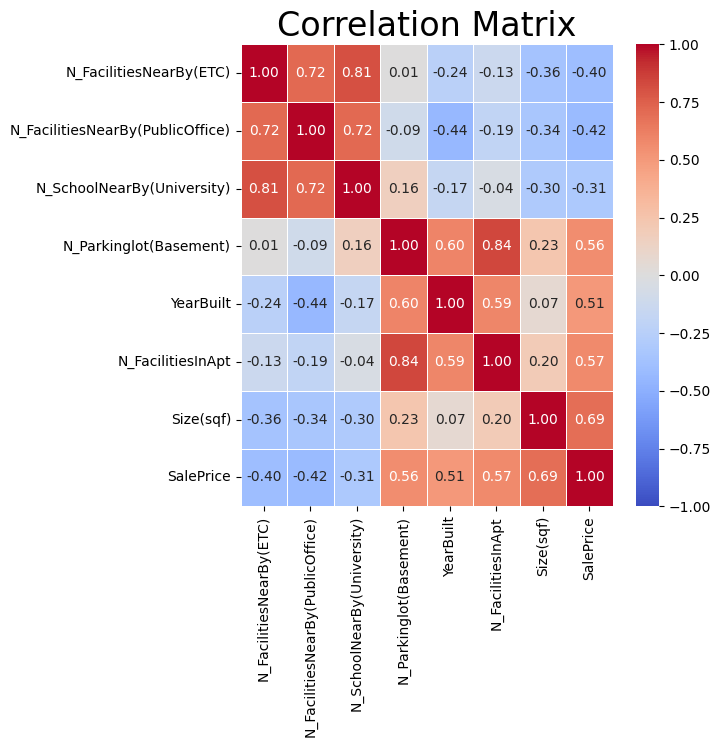

In [84]:
# Correlation Matrix

# Select only numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=[np.number])

# Calculate the correlation
corr = df_numerical.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix', size=24)
plt.show()


**Explanation:**
1. On average, correlation matrix shows the influence of the features on the sale price (target) and the correlation of each column is around 0.31 - 0.69, this shows that all the columns have an influence towards the apartment sale price.

2. Size in square feet has the biggest influence towards the apartment sale data (0.69).

3. Features that have a **positive correlation** with the apartment sale prices are **the number of facilities in the apartment, the year of construction, size, and the number of basement parking lots**. This shows that **the more the number of facilities in the apartment, the newer the apartment, the bigger the size, and the more the number of basement parking lots, the more expensive the apartment will be.**

4. Features that have a **negative correlation** with apartment sale prices are **the number of public office facilities closest to the apartment, the number of other nearby facilities to the apartment, and the number of universities closest to the apartment.** This shows that **the more public office facilities, the more nearby facilities, and universities near the apartment, the cheaper the price of the apartment will be.**

5. It can be seen that there is a strong correlation between the independent variables, namely the number of other closest facilities from the apartment to the number of universities closest to the apartment (correlation value = 0.81) and other nearby facilities from the apartment to the number of public office facilities closest to the apartment (correlation value = 0.72). This indicates the presence of multicollinearity where two or more independent variables in the model have a high correlation with each other and can cause problems in regression analysis using the least squares method to estimate regression parameters such as linear regression or logistic regression because it can affect the interpretation of the regression coefficients and make unstable estimates.


# **5. FEATURE ENGINEERING**

**Scaling**

Scaling is the process of transforming numerical data in a dataset so that the values ​​are within a certain range with the aim of improving consistency between variables that have different units or ranges so that these variables can be compared fairly. In the context of machine learning, scaling is often used in algorithms that are sensitive to differences in data scale, such as regression algorithms. Scaling can also help optimize algorithm performance, reduce computation time, and improve model interpretability.

In the dataset there are features that have very different ranges, namely the N_Parkinglot(Basement) and Size(Sqf) features. So we will do the Robust Scaler on the N_Parkinglot(Basement) and Size(sqf) features because this method can improve the consistency of data that has outliers and skewed data distribution thereby reducing the influence of extreme values ​​on the analysis results.


**Encoding**

Encoding is the process of converting data from one format to another, which is usually done on categorical data to become numerical data before it can be used to train a model.

In the dataset there are several features which are categorical data so we need to encode the categorical data. The encoding to be performed is as follows:
* One-Hot Encoding: HallwayType, because feature is a nominal variable that has 3 categories (we use One-Hot Encoding compared to Binary Encoding because the number of categories is not too many)
* Binary Encoding: SubwayStation, because feature is a nominal variable that has 8 categories (we use Binary Encoding instead of One-Hot Encoding because the number of categories is quite large so we want to create fewer dummy variables and reduce the overfitting that occurs when the variables used in the build more models)
* Ordinal Encoding: TimeToSubway, because features are ordinal variables and categories in features have sequences based on the time it takes to get to the nearest station


In [85]:
# Scaling dan encoding

ordinal_encoder_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '0min-5min':1, '5min-10min':2, '10min-15min':3, '15-20min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_encoder_mapping)

transformer = ColumnTransformer([
            ('Robust',RobustScaler(),['N_Parkinglot(Basement)','Size(sqf)']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

# **6. SPLITTING TARGET AND FEATURES**

Previously we will define the variables x and y. In regression modeling, x is the independent variable used to predict the value of y or the dependent variable. Meanwhile y is the dependent variable or the variable you want to predict.

* X = HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf)
* Y = SalePrice

The data is separated into 2 parts, namely 80% for training data and 20% for testing data. Training data is used to train machine learning models while data testing is used to test the performance of models that have been trained.

In [86]:
# Split data

x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

# **7. Benchmark Model**

After the dataset has been separated into training data and testing data, we will now choose a benchmark model to determine the reference model that will be used as a basis for comparison to compare the performance of the newly developed model.


Some of the regression models that will be used in selecting the benchmark model are as follows:
1. Linear Regression: Model used to model a linear relationship between one or more input variables and target variables.
2. Lasso Regression: A linear regression model used to reduce overfitting by adding the absolute number of coefficients as a regularization to the linear regression equation where some of the coefficients are set to zero so that the model considers only the most important features.
3.  Ridge Regression: A linear regression model used to reduce overfitting by adding the sum of the squares of the coefficients as a regularization to the linear regression equation.
4. KNN Regression: A regression model based on the K-Nearest Neighbors (KNN) algorithm by finding the K nearest neighbors of the input data you want to predict and then predicting the numerical target variable.
5. Decision Tree Regression: The regression model is in the form of a decision tree structure consisting of a series of nodes and edges.
6.  Random Forest Regression: A regression model that builds several decision trees randomly using different training data subsets and random feature subsets from the available datasets and each decision tree is generated using bootstrap sampling and feature bagging techniques.
7. XGBoost (Extreme Gradient Boosting) Regression: A regression model that utilizes gradient boosting techniques with an ensemble learning approach.
8. Support Vector Regression(SVR): A regression model used to predict target values ​​based on independent features or variables provided with an approach similar to Support Vector Machine (SVM) but has the goal of finding the best hyperplane (line or field) that can separate data in feature space.

K-fold cross validation is also used as a model performance evaluation method which is done by dividing the dataset into 5 equal partitions then the model will be trained on 4 partitions and tested on the remaining partitions. This procedure will be carried out 5 times with different partitions as validation data and training data so that finally the model performance will be calculated based on the average performance. This method is useful to avoid overfitting or underfitting and to obtain better model generalization.

In [87]:
Lineal_Regression=LinearRegression()
Lasso_model=LassoRegressor(random_state=100)
Ridge_model=RidgeRegressor(random_state=100)
KNN=KNeighborsRegressor()
Decision_Tree=DecisionTreeRegressor(random_state=100)
Random_Forest=RandomForestRegressor(random_state=100)
XGBoost=xgb.XGBRegressor()
SVR=SVR()

models=[Lineal_Regression,Lasso_model,Ridge_model,KNN,Decision_Tree,Random_Forest,XGBoost,SVR]

score_R2=[]
mean_R2=[]
std_R2=[]

score_RMSE=[]
mean_RMSE=[]
std_RMSE=[]

score_MAE=[]
mean_MAE=[]
std_MAE=[]

score_MAPE=[]
mean_MAPE=[]
std_MAPE=[]

kfold=KFold(n_splits=5)

for i in models:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',i)
    ])

    # R-Squared
    model_cv_R2=cross_val_score(model_pipeline,xtrain,ytrain,cv=kfold,scoring='r2')
    score_R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_RMSE=cross_val_score(model_pipeline,xtrain,ytrain,cv=kfold,scoring='neg_root_mean_squared_error')
    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE=cross_val_score(model_pipeline,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_error')
    score_MAE.append(model_cv_MAE)
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE=cross_val_score(model_pipeline,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_percentage_error')
    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

In [88]:
# Evaluation Result

Evaluation_Result=pd.DataFrame({
    'Model': ['Linear Regression','Lasso','Ridge','KNN','Decision Tree','Random Forest','XGBoost','SVR'],
    'Mean R2': mean_R2,
    'Standar Deviasi R2': std_R2,
    'Mean RMSE': mean_RMSE,
    'Standard Deviasi RMSE': std_RMSE,
    'Mean MAE': mean_MAE,
    'Standard Deviasi MAE': std_MAE,
    'Mean MAPE': mean_MAPE,
    'Standard Deviasi MAPE': std_MAPE,
}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)

Evaluation_Result

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Random Forest,0.801807,0.010705,-46764.792053,1009.746861,-37317.532074,1147.752296,-0.190830,0.007840
XGBoost,0.801328,0.010814,-46818.024886,879.705293,-37318.110579,1078.386066,-0.191169,0.008104
Decision Tree,0.800322,0.010979,-46935.140307,825.789659,-37381.341830,1029.233236,-0.191547,0.008172
KNN,0.769907,0.014623,-50408.642682,2139.013876,-39457.994967,1050.776631,-0.201716,0.008027
Linear Regression,0.766617,0.009522,-50784.364285,1815.174755,-41516.150089,1551.200829,-0.212940,0.006433
Lasso,0.766617,0.009520,-50784.427098,1815.415405,-41516.881701,1551.702010,-0.212947,0.006426
Ridge,0.766636,0.009558,-50782.411281,1820.360737,-41521.218016,1558.110767,-0.213030,0.006412
SVR,-0.012344,0.013806,-105813.206042,3904.340433,-85663.890402,2565.260080,-0.555563,0.041097


**VOTING and STACKING**

In addition, we will also try to combine several different regression models to improve predictive performance. In this technique, multiple regression models are trained on the same training data and then the predictions from each model are combined to provide the final prediction.

We will not use the SVR model because based on the results of previous evaluations, the SVR model has a much larger mean RMSE, MAE, and MAPE than the other models, so this means that the predictive quality of the SVR model is not good.

In [89]:
#VOTING

voting=VotingRegressor([
  ('model1',Lineal_Regression),
  ('model2',Lasso_model),
  ('model3',Ridge_model),
  ('model4',KNN),
  ('model5',Decision_Tree),
  ('model6',Random_Forest),
  ('model7',XGBoost)
])

score_R2_voting=[]
mean_R2_voting=[]
std_R2_voting=[]

score_RMSE_voting=[]
mean_RMSE_voting=[]
std_RMSE_voting=[]

score_MAE_voting=[]
mean_MAE_voting=[]
std_MAE_voting=[]

score_MAPE_voting=[]
mean_MAPE_voting=[]
std_MAPE_voting=[]

kfold=KFold(n_splits=5)

model_pipeline3=Pipeline([
('preprocess',transformer),
('model',voting)
])

# R-Squared
model_cv_R2_voting=cross_val_score(model_pipeline3,xtrain,ytrain,cv=kfold,scoring='r2')
score_R2_voting.append(model_cv_R2_voting)
mean_R2_voting.append(model_cv_R2_voting.mean())
std_R2_voting.append(model_cv_R2_voting.std())

# RMSE
model_cv_RMSE_voting=cross_val_score(model_pipeline3,xtrain,ytrain,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_voting.append(model_cv_RMSE_voting)
mean_RMSE_voting.append(model_cv_RMSE_voting.mean())
std_RMSE_voting.append(model_cv_RMSE_voting.std())

# MAE
model_cv_MAE_voting=cross_val_score(model_pipeline3,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_voting.append(model_cv_MAE_voting)
mean_MAE_voting.append(model_cv_MAE_voting.mean())
std_MAE_voting.append(model_cv_MAE_voting.std())

# MAPE
model_cv_MAPE_voting=cross_val_score(model_pipeline3,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_voting.append(model_cv_MAPE_voting)
mean_MAPE_voting.append(model_cv_MAPE_voting.mean())
std_MAPE_voting.append(model_cv_MAPE_voting.std())

In [90]:
# VOTING RESULT

kfold_voting=pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Mean R2': mean_R2_voting,
    'Standar Deviasi R2': std_R2_voting,
    'Mean RMSE': mean_RMSE_voting,
    'Standard Deviasi RMSE': std_RMSE_voting,
    'Mean MAE': mean_MAE_voting,
    'Standard Deviasi MAE': std_MAE_voting,
    'Mean MAPE': mean_MAPE_voting,
    'Standard Deviasi MAPE': std_MAPE_voting
}).set_index('Model')

kfold_voting

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Voting Regressor,0.799923,0.006851,-47016.531935,1361.645224,-38177.632079,1369.304112,-0.195893,0.006429


In [91]:
#STACKING
stacking=StackingRegressor([
  ('model1',Lineal_Regression),
  ('model2',Lasso_model),
  ('model3',Ridge_model),
  ('model4',KNN),
  ('model5',Decision_Tree),
  ('model6',Random_Forest),
  ('model7',XGBoost)
])
score_R2_stacking=[]
mean_R2_stacking=[]
std_R2_stacking=[]

score_RMSE_stacking=[]
mean_RMSE_stacking=[]
std_RMSE_stacking=[]

score_MAE_stacking=[]
mean_MAE_stacking=[]
std_MAE_stacking=[]

score_MAPE_stacking=[]
mean_MAPE_stacking=[]
std_MAPE_stacking=[]

kfold=KFold(n_splits=5)

model_pipeline4=Pipeline([
('preprocess',transformer),
('model',stacking)
])

# R-Squared
model_cv_R2_stacking=cross_val_score(model_pipeline4,xtrain,ytrain,cv=kfold,scoring='r2')
score_R2_stacking.append(model_cv_R2_stacking)
mean_R2_stacking.append(model_cv_R2_stacking.mean())
std_R2_stacking.append(model_cv_R2_stacking.std())

# RMSE
model_cv_RMSE_stacking=cross_val_score(model_pipeline4,xtrain,ytrain,cv=kfold,scoring='neg_root_mean_squared_error')
score_RMSE_stacking.append(model_cv_RMSE_stacking)
mean_RMSE_stacking.append(model_cv_RMSE_stacking.mean())
std_RMSE_stacking.append(model_cv_RMSE_stacking.std())

# MAE
model_cv_MAE_stacking=cross_val_score(model_pipeline4,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_error')
score_MAE_stacking.append(model_cv_MAE_stacking)
mean_MAE_stacking.append(model_cv_MAE_stacking.mean())
std_MAE_stacking.append(model_cv_MAE_stacking.std())

# MAPE
model_cv_MAPE_stacking=cross_val_score(model_pipeline4,xtrain,ytrain,cv=kfold,scoring='neg_mean_absolute_percentage_error')
score_MAPE_stacking.append(model_cv_MAPE_stacking)
mean_MAPE_stacking.append(model_cv_MAPE_stacking.mean())
std_MAPE_stacking.append(model_cv_MAPE_stacking.std())

In [92]:
# STACKING RESULT 

kfold_stacking=pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Mean R2': mean_R2_stacking,
    'Standar Deviasi R2': std_R2_stacking,
    'Mean RMSE': mean_RMSE_stacking,
    'Standard Deviasi RMSE': std_RMSE_stacking,
    'Mean MAE': mean_MAE_stacking,
    'Standard Deviasi MAE': std_MAE_stacking,
    'Mean MAPE': mean_MAPE_stacking,
    'Standard Deviasi MAPE': std_MAPE_stacking
}).set_index('Model')

kfold_stacking

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Stacking Regressor,0.802912,0.00783,-46653.292594,1131.950937,-37480.802444,1280.364694,-0.190255,0.007004


# **Summary of evaluation result of all model after voting and stacking**

In [93]:
summary_best_model=pd.DataFrame({
        'Model':['Linear Regression','Lasso Regression','Ridge Regression','KNN Regressor','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor','SVR','Voting Regressor','Stacking Regressor'],
        'Mean R2': mean_R2+mean_R2_voting+mean_R2_stacking,
        'Standar Deviasi R2': std_R2+std_R2_voting+std_R2_stacking,
        'Mean RMSE': mean_RMSE+mean_RMSE_voting+mean_RMSE_stacking,
        'Standard Deviasi RMSE':  std_RMSE+std_RMSE_voting+std_RMSE_stacking,
        'Mean MAE': mean_MAE+mean_MAE_voting+mean_MAE_stacking,
        'Standard Deviasi MAE':  std_MAE+std_MAE_voting+std_MAE_stacking,
        'Mean MAPE': mean_MAPE+mean_MAPE_voting+mean_MAPE_stacking,
        'Standard Deviasi MAPE':  std_MAPE+std_MAPE_voting+std_MAPE_stacking}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)
summary_best_model

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Stacking Regressor,0.802912,0.007830,-46653.292594,1131.950937,-37480.802444,1280.364694,-0.190255,0.007004
Random Forest Regressor,0.801807,0.010705,-46764.792053,1009.746861,-37317.532074,1147.752296,-0.190830,0.007840
XGBoost Regressor,0.801328,0.010814,-46818.024886,879.705293,-37318.110579,1078.386066,-0.191169,0.008104
Decision Tree Regressor,0.800322,0.010979,-46935.140307,825.789659,-37381.341830,1029.233236,-0.191547,0.008172
Voting Regressor,0.799923,0.006851,-47016.531935,1361.645224,-38177.632079,1369.304112,-0.195893,0.006429
KNN Regressor,0.769907,0.014623,-50408.642682,2139.013876,-39457.994967,1050.776631,-0.201716,0.008027
Linear Regression,0.766617,0.009522,-50784.364285,1815.174755,-41516.150089,1551.200829,-0.212940,0.006433
Lasso Regression,0.766617,0.009520,-50784.427098,1815.415405,-41516.881701,1551.702010,-0.212947,0.006426
Ridge Regression,0.766636,0.009558,-50782.411281,1820.360737,-41521.218016,1558.110767,-0.213030,0.006412


**Explanation:**

1. Based on the evaluation results above, the **Stacking Regressor and Random Forest Regressor** models have the smallest **mean MAPE** compared to other models where the Random Forest Regressor is the best model. The smaller the MAPE values ​​indicate that the better the quality of the model predictions. In addition, the standard deviation values ​​of MAPE are also relatively small, indicating that the results are **consistent**.

2. So, **Stacking Regressor and Random Forest Regressor** are the best 2 benchmark models and predictions will be made on data testing.


# **8. HYPERTUNING BEST MODEL**

In [94]:
# BENCHMARK TWO BEST MODELS BEFORE TUNING

models={
    'Random Forest':RandomForestRegressor(random_state=100),
    'Voting Regression':VotingRegressor([('model1',Lineal_Regression),('model2',Lasso_model),('model3',Ridge_model),('model4',KNN),('model5',Decision_Tree),('model6',Random_Forest),('model7',XGBoost)])
}
score_R2=[]
score_RMSE=[]
score_MAE=[]
score_MAPE=[]

for i in models:
    model=Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])
    model.fit(xtrain, ytrain)
    ypred=model.predict(xtest)

    score_R2.append(r2_score(ytest, ypred))
    score_RMSE.append(np.sqrt(mean_squared_error(ytest, ypred)))
    score_MAE.append(mean_absolute_error(ytest, ypred))
    score_MAPE.append(mean_absolute_percentage_error(ytest, ypred))

score_before_tuning=pd.DataFrame({'R2':score_R2,'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index=models.keys()).sort_values(by='MAPE')

score_before_tuning

,R2,RMSE,MAE,MAPE
Random Forest,0.799511,47150.904636,37866.211524,0.200179
Voting Regression,0.795878,47576.149112,39150.943246,0.207932


**We will only use Random Forest because Voting Regression is an ensemble method does not have best param so we cannot hypertune it to get the best model**

**Explanation:**

After predicting the data testing, the Decision Tree Regressor model is the best model because it has the smallest mean RMSE, mean MAE, and mean MAPE compared to other models.

**HYPERTUNING:**
1. Now we will perform hyperparameter tuning to find the best combination of parameters in a machine learning model with the aim of increasing the performance and accuracy of the model. Based on the metrics used, the Random Forest Regression model is the model that has the best performance when performing cross validation while the Decision Tree Regression model is the model that has the best performance when making predictions on data testing.

2. Therefore, we will perform hyperparameter tuning on both models, namely the **Random Forest Regressor model** to improve model performance and ultimately choose the best final model.

### **Model Random Forest Regressor**

Random Forest is an ensemble method that combines machine learning Decision Tree models with different data characteristics which aim to minimize the variety of prediction values ​​and make the prediction results more stable where the final predictive results are obtained from a majority vote. In the Random Forest, we randomly select candidate features to be used in each splitting tree.

The following are the parameters that will be used when performing hyperparameter tuning of the Random Forest model:
* n_estimators: Number of decision trees built in a random forest.
When performing hyperparameter tuning, the values ​​to be used are 1 to 1000.
* criterion: Function to measure split quality. The criteria commonly used for regression are MSE, MAE, Friedman MSE, and Poisson.
* max_depth: The maximum depth of each decision tree in a random forest. The deeper the decision tree, the greater the possibility of overfitting.
When performing hyperparameter tuning, the values ​​to be used are 1 to 50.
* max_features: The maximum number of features used in each decision tree to divide a node. The fewer features used, the less likely it is overfitting.
* min_samples_split: Minimum number of data points needed to split a node. The greater the value of min_samples_split, the less the division of nodes, thereby reducing the possibility of overfitting, but if the value is too large, the more it can cause underfitting.
When performing hyperparameter tuning, the values ​​to be used are 2 to 20.
* min_samples_leaf: Minimum number of samples required for each leaf in the decision tree. The greater the min_samples_leaf value, the fewer nodes will be generated and can reduce the possibility of overfitting, but if the value is too large, it can cause underfitting.
When performing hyperparameter tuning, the values ​​to be used are 1 to 20.

In [95]:
# Hyperparameter Random Forest

hyperparam_forest={
        'modeling__n_estimators': list(np.arange(1,1001)),
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

# **RANDOMIZED SEARCH**

**Randomized search** is a method for searching random combinations of hyperparameters in a model. After the correct hyperparameter is found, the model can be retrained with the optimized hyperparameter.

We will use randomized search instead of grid search because randomized search is more effective in reducing the time it takes to find the right hyperparameters.

In [96]:
# Algorithm (benchmark model)

Random_Forest=RandomForestRegressor(random_state=100)

pipe_model_Random_Forest = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Random_Forest)
 ])

kfold=KFold(n_splits=5)

# RandomizedSearch

randomsearch_forest=RandomizedSearchCV(
        estimator=pipe_model_Random_Forest,              # Best model for tuning
        param_distributions=hyperparam_forest,    # Hyperparameter
        cv=kfold,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # maximize processor
        refit='neg_mean_absolute_percentage_error',
        random_state=100
)

In [97]:
# Fit model with hyperparameter tuning for data training

randomsearch_forest.fit(xtrain,ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']...
                                        'modeling__min_samples_split': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16, 17,
                                                                        18, 19,
                                                                        20],
                                        'modeling__n_estimators': [1, 2, 3, 4,
                                                                   5, 6, 7, 8,
                                                                   9, 10, 11,
                                                                   12, 13, 14,
                                                                   15, 16, 17,
                                                                   18, 19, 20,
                                                                   21, 22, 23,
                                                                   24, 25, 26,
                                                                   27, 28, 29,
                                                                   30, ...]},
                   random_state=100, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [114]:
# Best Parametric for Random Forest

print('Best Param:')
randomsearch_forest.best_params_

Best Param:


{'modeling__n_estimators': 341,
 'modeling__min_samples_split': 6,
 'modeling__min_samples_leaf': 5,
 'modeling__max_features': 'sqrt',
 'modeling__max_depth': None,
 'modeling__criterion': 'absolute_error'}

In [99]:
# Best score 

print(f'MAPE value of random forest (best model) after hyperparameter tuning: {randomsearch_forest.best_score_}')

MAPE value of random forest (best model) after hyperparameter tuning: -0.1855311685359656


### **Predictions to Data Testing with Tuned Random Forest Models**


Now we will make predictions on data testing using the Random Forest model which has been done with hyperparameter tuning to test the model's performance

In [100]:
model = {'Random Forest': RandomForestRegressor(random_state=100)}

# Define model terhadap estimator terbaik
random_forest_tuning = randomsearch_forest.best_estimator_

# Fitting model
random_forest_tuning.fit(xtrain, ytrain)

# Prediksi ke data testing
y_pred_forest_tuning = random_forest_tuning.predict(xtest)

nilai_R2_forest_tuning=r2_score(ytest, y_pred_forest_tuning)
nilai_RMSE_forest_tuning=np.sqrt(mean_squared_error(ytest, y_pred_forest_tuning))
nilai_MAE_forest_tuning=mean_absolute_error(ytest, y_pred_forest_tuning)
nilai_MAPE_forest_tuning=mean_absolute_percentage_error(ytest, y_pred_forest_tuning)

score_after_tuning_forest=pd.DataFrame({'R2': nilai_R2_forest_tuning, 'RMSE': nilai_RMSE_forest_tuning, 'MAE': nilai_MAE_forest_tuning, 'MAPE': nilai_MAPE_forest_tuning}, index=model.keys())
score_after_tuning_forest

,R2,RMSE,MAE,MAPE
Random Forest,0.780056,49385.705911,37988.069427,0.196678


### **Performance Comparison of Random Forest Models Before and After Hyperparameter Tuning**

In [101]:
print('score before tuning:')
display(pd.DataFrame(score_before_tuning.loc['Random Forest']))
print('score after tuning:')
score_after_tuning_forest

score before tuning:


,Random Forest
R2,0.799511
RMSE,47150.904636
MAE,37866.211524
MAPE,0.200179


score after tuning:


,R2,RMSE,MAE,MAPE
Random Forest,0.780056,49385.705911,37988.069427,0.196678


**Explanation:**

1. The performance of the Random Forest model on data testing after hyperparameter tuning showed an increase because of the RMSE, MAE, and MAPE values ​​after hyperparameter tuning, although the decrease was not too significant. This shows that the smaller the value of the prediction error and the model is successful in making more accurate predictions.

2. **Random Forest** will be the final model for predicting the apartment sale price in Daegu, South Korea.



# **Residual Plot**

The Random Forest model will be evaluated exploratively by using residual plots to see whether the Random Forest Regressor model can predict values ​​accurately or not. The residual plot is a graph that shows the difference between the actual value and the value predicted by the model.

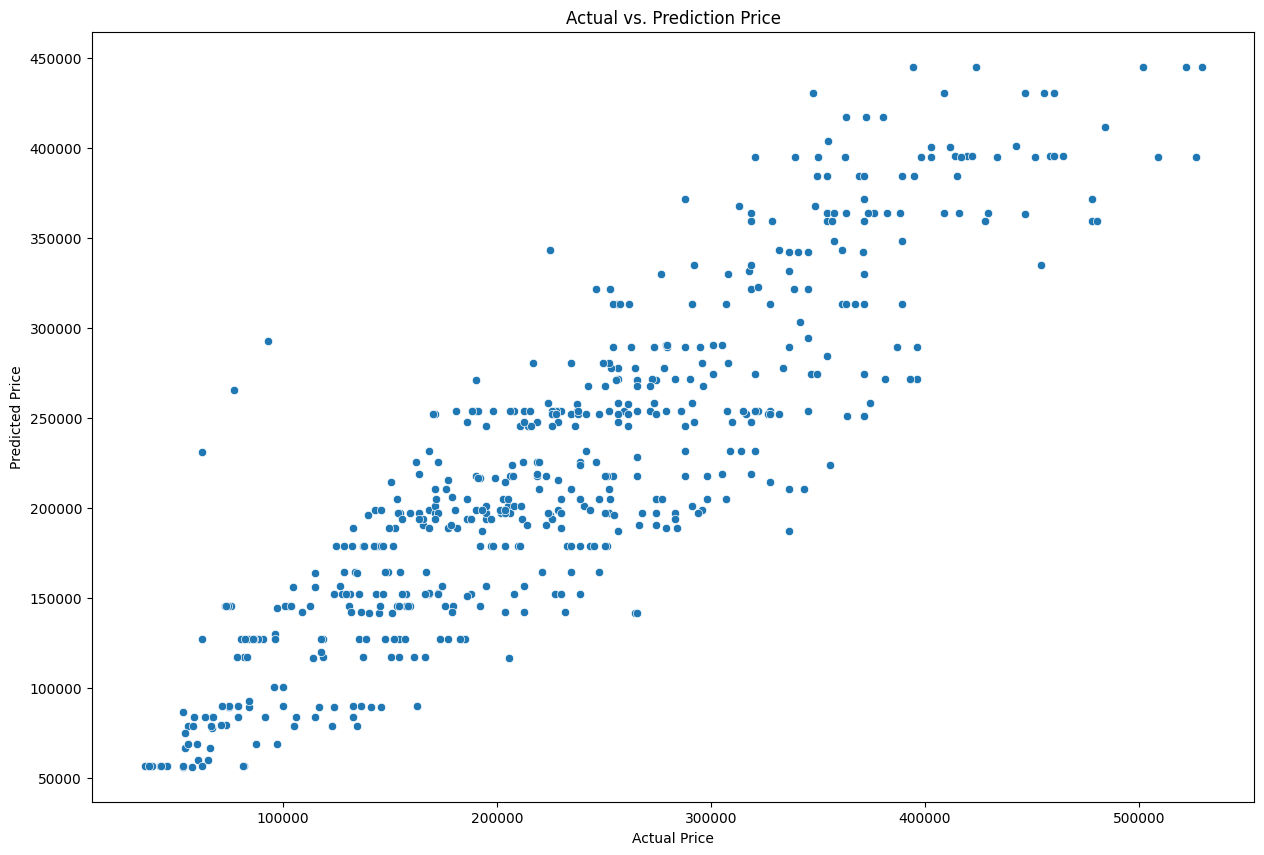

In [102]:
plt.figure(figsize=(15, 10))
plot = sns.scatterplot(x=ytest, y=y_pred_forest_tuning).set(title='Actual vs. Prediction Price',  
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')



In [103]:
# Residual = y_actual - y_prediction
residual = ytest-y_pred_forest_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_forest_tuning,
    'residual': residual 
})

display(df_residual)



,y_pred,residual
71,252372.356305,-10780.356305
957,245614.456012,-31013.456012
1744,217840.284457,-27575.284457
203,321760.244868,-68946.244868
775,197110.630499,-37818.630499
...,...,...
1156,329894.799120,-21930.799120
746,254021.173021,-38535.173021
2516,384511.964809,-12830.964809
2559,219077.936950,-55538.936950


**Explanation:**

There are only 536 rows in residual value dataframe of the data although there are 2677 rows because I used kfold cross validation=5 so I only get 1/5 of the data.


<Axes: xlabel='residual'>

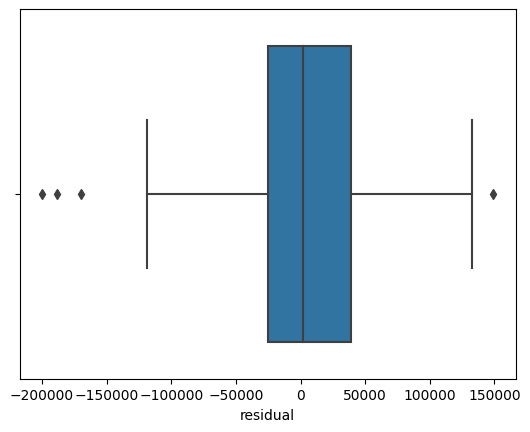

In [104]:
#check if the residual has outliers.

sns.boxplot(data=df_residual,x='residual') 


In [105]:
#There are several outliers.

Q1 = df_residual['residual'].quantile(0.25)
Q3 = df_residual['residual'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_residual[(df_residual['residual'] < (Q1 - 1.5 * IQR)) | (df_residual['residual'] > (Q3 + 1.5 * IQR))]
display(outliers)
print(f'Percentage of outliers in the actual vs predicted apartment sale price is {len(outliers)/len(df_residual)*100}%')
print('There are only 4 outliers amongst 536 rows in total or only 0.746% of the total data')



,y_pred,residual
2637,265605.436950,-188614.436950
1099,231495.758065,-169549.758065
2629,292853.539589,-199933.539589
2511,187380.010264,148902.989736


Percentage of outliers in the actual vs predicted apartment sale price is 0.7462686567164178%
There are only 4 outliers amongst 536 rows in total or only 0.746% of the total data


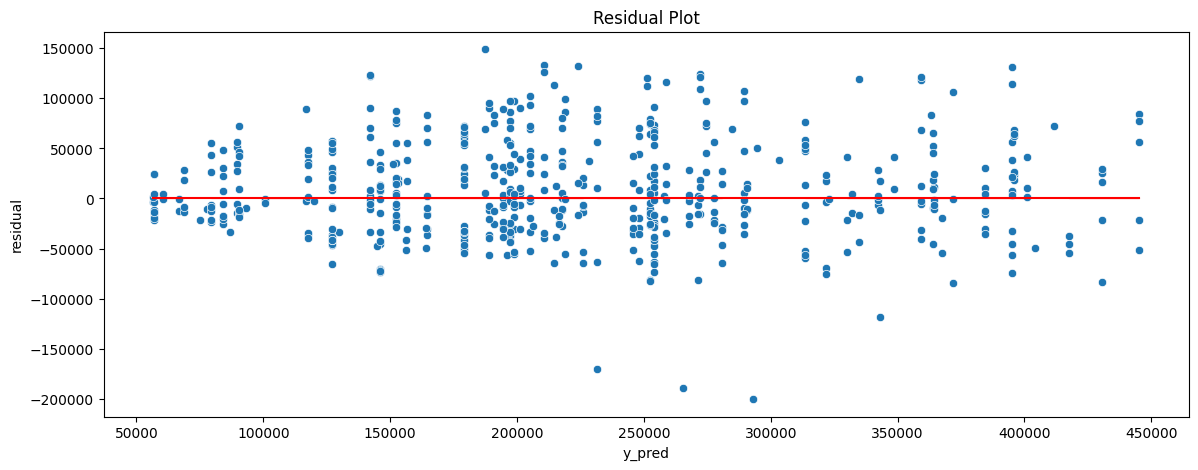

Model Trained sale price range: Lowest sale price = 32743 and highest sale price = 585840



In [106]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.show()

print(f'''Model Trained sale price range: Lowest sale price = {ytrain.min()} and highest sale price = {ytrain.max()}
''')

**Explanation:**

Based on the residual plot above, the residuals appear to be randomly distributed along the horizontal axis and do not have a specific pattern, indicating that the regression model is generally suitable for data on apartment prices in Daegu, South Korea. The residual plot above represents
the average absolute percentage error between the predicted apartment prices and the actual value of the apartment prices was 19.6% when predicting apartment prices with the model-trained price range (minimum apartment price is 32,743 won and maximum apartment price is 585,840 won).

# **Feature Importance**

We are going to evalute every feature that has impact on the apartment sale price in Daegu, South Korea in Random Forest Regressor model by using the feature importance function.

In [107]:
transformers = ColumnTransformer([
            ('Robust',RobustScaler(),['N_Parkinglot(Basement)','Size(sqf)']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

In [108]:
# Define the pipeline
pipeline_importance = Pipeline(steps=[
    ('preprocessor', transformers),
    ('model', RandomForestRegressor(n_estimators=341,
                                   min_samples_split=6,
                                   min_samples_leaf=5,
                                   max_features='sqrt',
                                   max_depth=None,
                                   criterion='absolute_error',
                                   random_state=100))
])

# Fit the pipeline to your data
pipeline_importance.fit(xtrain, ytrain)

# Get the feature importances from the fitted model
importances = pipeline_importance.named_steps['model'].feature_importances_

# Get the transformed feature names
transformers.fit(xtrain)
onehot_features = transformers.named_transformers_['OneHotEncoding'].get_feature_names_out(['HallwayType'])
binary_features = transformers.named_transformers_['BinaryEncoding'].get_feature_names_out(['SubwayStation'])
ordinal_features = ['TimeToSubway']
passthrough_features = [col for col in xtrain.columns if col not in ['HallwayType', 'SubwayStation', 'TimeToSubway']]

feature_names = np.concatenate([onehot_features, binary_features, ordinal_features, passthrough_features])

# Map the importances to the corresponding feature names and create a DataFrame
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Set the index of the DataFrame to 'feature'
feature_importance_df.set_index('feature', inplace=True)

feature_importance_df


,importance
feature,
HallwayType_terraced,0.306458
SubwayStation_1,0.127494
N_FacilitiesInApt,0.121511
HallwayType_mixed,0.117556
Size(sqf),0.108248
N_SchoolNearBy(University),0.068909
N_Parkinglot(Basement),0.053134
YearBuilt,0.029011
N_FacilitiesNearBy(PublicOffice),0.020403


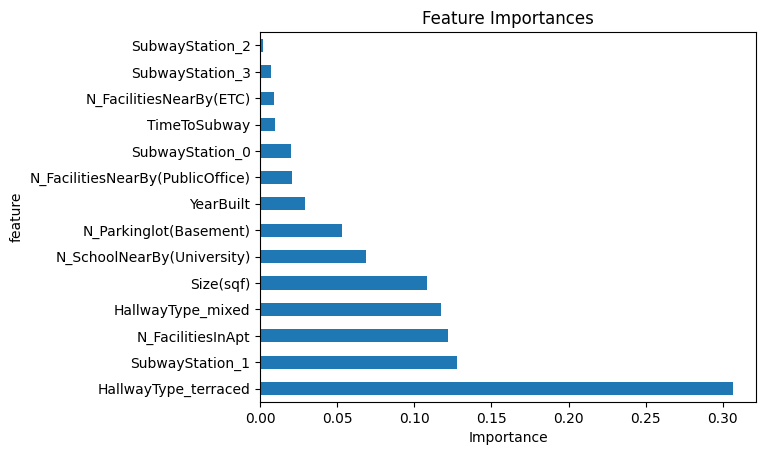

In [109]:
# Plot feature importances
feature_importance_df.plot(kind='barh', title='Feature Importances', legend=False)
plt.xlabel('Importance')
plt.show()

**Explanation:**

This shows that Terraced Type has the biggest impact towards the Daegu Apartment Sale Price

# **9. CONCLUSION:**

The evaluation metrics used for the regression model are RMSE, MAE, and MAPE because these three metrics are the most commonly used evaluation metrics for regression models and help identify how well the model is able to generalize the patterns found in the training data to new data.

However, **MAPE** was chosen as the most important metric evaluation to provide results that are easy to interpret and can help in explaining prediction errors to stakeholders, namely real estate agents. 

Based on metric evaluation, the final model chosen to predict apartment prices in Daegu, South Korea is the **Random Forest Regressor** model which has been tuned where the model has a MAPE value of 19.66%, so it means that if the model is used to predict apartment prices with a price range who have been trained on the model (the minimum price for an apartment is 32,743 won and the maximum price for an apartment is 585,840 won) 

**Based on Lewis (1982), a MAPE value of 10% to 20% can be interpreted as a model that has good forecasting abilities.**

However, apartment price predictions can also miss the actual apartment prices due to bias that may occur due to limited features used so that the features in the dataset do not adequately represent the factors affecting apartment prices in Daegu, South Korea.

Based on the selected final model, the features that most influence the price of apartments in Daegu, South Korea are:
1. The type of terraced apartment.
2. The nearest distance of the apartment towards specific subway station.
3. Total facilities available in the apartment.
4. The type of Mixed apartment.
5. The size of the apartment. 

By using the final model chosen, we can help real estate agents to determine the right apartment selling price in the city of Daegu, South Korea so as to increase the success rate for marketing and selling the apartment unit.

Prior to the existence of regression models, we only had raw data regarding apartment characteristics and apartment prices in Daegu which were difficult to interpret and did not provide useful insight into the relationship between apartment characteristics and apartment prices. With the regression model, we can perform a more detailed analysis and gain a better understanding of how apartment characteristics and apartment prices are related. 

In addition, the regression model can also be used to predict changes in the value of apartment prices that might occur if the characteristics of the apartment change. 

In this case, the impact after the regression model is greater than before the regression model, because real estate agents can take more appropriate actions or decisions based on the results of the regression model analysis, namely they can determine the appropriate apartment price.

# **10. RECOMMENDATION:**

Here are some recommendations that can be given:

1. Consider adding features that have a stronger relationship to apartment prices in Daegu, South Korea directly such as on what floor the apartment is located, the year the apartment was sold, the number of rooms in the apartment (number of bedrooms, bathrooms, kitchens), information on inclusiveness of furniture in the apartment, and so on.

2. Consider external factors that as a whole can have an impact on market prices for apartments in Daegu, South Korea such as interest rates, Consumer Price Index (CPI), Gross Domestic Product (GDP) performance, and so on.

3. Expanding the dataset by collecting more data that has more up-to-date information regarding apartment prices in Daegu, South Korea to increase the relevance of the dataset when building predictive models so as to produce better predictive model accuracy and help improve regression models to study patterns in data.

4. Trying to use other, more complex machine learning models to build apartment price prediction models such as Recurrent Neural Network (RNN). But a more complex model will also make the model more difficult to understand.

5. The Random Forest Regressor model, which is the final model chosen to assist real estate agents in predicting apartment prices in Daegu, South Korea, should be used to predict a minimum apartment price of 32,743 won and a maximum apartment price of 585,840 won to produce an average percentage the absolute error between the predicted price and the actual price is 19.66%.


# **FINAL STEP: SAVE MACHINE LEARNING**

In [110]:
# Import pickle
import pickle as pickle

In [111]:
# Save Machine Learning
pipe_model=Pipeline([
    ('preprocessing',transformer),
    ('model',RandomForestRegressor(n_estimators=341,
                                   min_samples_split=6,
                                   min_samples_leaf=5,
                                   max_features='sqrt',
                                   max_depth=None,
                                   criterion='absolute_error',
                                   random_state=100)) 
])
pipe_model.fit(xtrain,ytrain)

pickle.dump(pipe_model,open('data_daegu_apartment.sav','wb'))



In [112]:
# Load Machine Learning

file_name='data_daegu_apartment.sav'

loaded_model=pickle.load(open(file_name,'rb'))

In [113]:
display(f'MAPE of the best model: {mean_absolute_percentage_error(ytest,loaded_model.predict(xtest))}')
display(f'MSE of the best model: {np.sqrt(mean_squared_error(ytest,loaded_model.predict(xtest)))}')


'MAPE of the best model: 0.19667788419082485'

'MSE of the best model: 49385.705911240766'